In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
print(X_train[0].shape)

(28, 28)


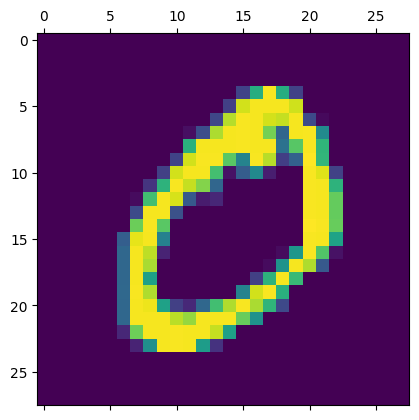

In [7]:
plt.matshow(X_train[1])

In [8]:
y_train[2]

4

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train.shape

(60000, 28, 28)

In [20]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [13]:
print(X_train_flattened)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train , epochs= 5)


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4697 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9255


In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2650 - accuracy: 0.9258


[0.2650443911552429, 0.9258000254631042]

313/313 [==============================] - 0s 1ms/step


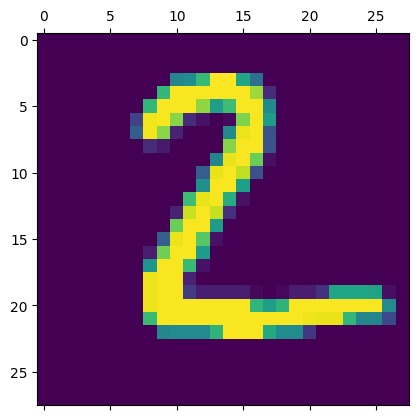

In [32]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]
plt.matshow(X_test[1])

In [33]:
np.argmax(y_predicted[1])

2

In [34]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [35]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [37]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    4,    7,    2,    2,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   6,    8,  931,   14,    8,    3,   12,    9,   37,    4],
       [   3,    0,   21,  921,    0,   22,    3,   10,   21,    9],
       [   1,    1,    2,    1,  912,    0,   14,    4,   10,   37],
       [  10,    2,    3,   39,   11,  759,   18,    7,   36,    7],
       [  11,    3,    6,    1,    7,    9,  915,    2,    4,    0],
       [   2,    5,   21,    5,    5,    0,    0,  960,    4,   26],
       [   6,    7,    6,   23,    9,   19,   10,   13,  874,    7],
       [  11,    7,    1,   11,   25,    4,    0,   27,    6,  917]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

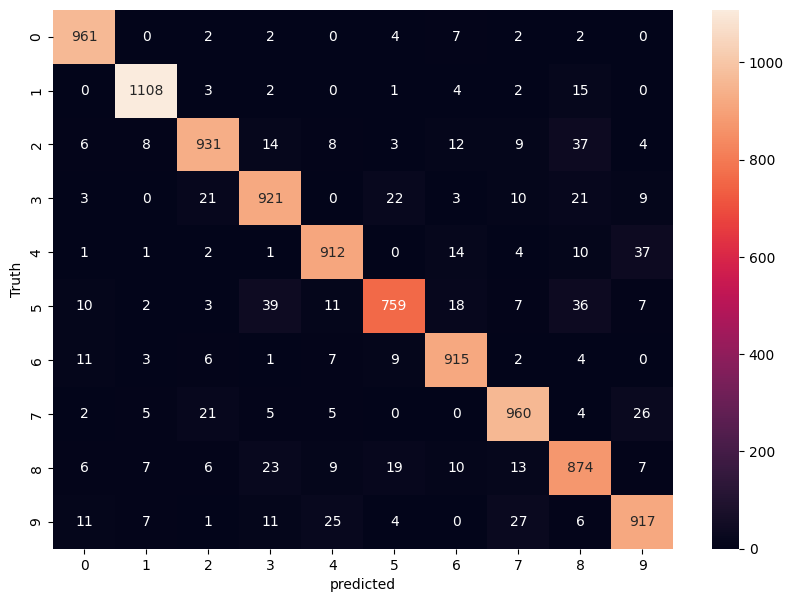

In [38]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')


In [39]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10,  activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train , epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2812 - accuracy: 0.9201
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1278 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0883 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0678 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0540 - accuracy: 0.9837


In [41]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0803 - accuracy: 0.9746


[0.08032339811325073, 0.9746000170707703]